In [10]:
from control.matlab import tf
import numpy as np
import matplotlib.pyplot as plt

"""
後で使う関数の定義
"""

def linestyle_generator():
    """グラフをプロットするときの線種を決めるジェネレータ"""
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

def plot_set(fig_ax, *args):
    """グラフを整える"""
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')
    if len(args) == 3:
        fig_ax.legend(loc=args[2])

def bodeplot_set(fig_ax, *args):
    """ボード線図を整える"""
    # ゲイン線図
    fig_ax[0].grid(which="both", ls=':')
    fig_ax[0].set_ylabel('Gain [dB]')

    # 位相線図
    fig_ax[1].grid(which="both", ls=':')
    fig_ax[1].set_xlabel('omega [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')

    # 凡例
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

c:\Users\asei\control.py\.venv\Lib\site-packages\control\timeresp.py:1083: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


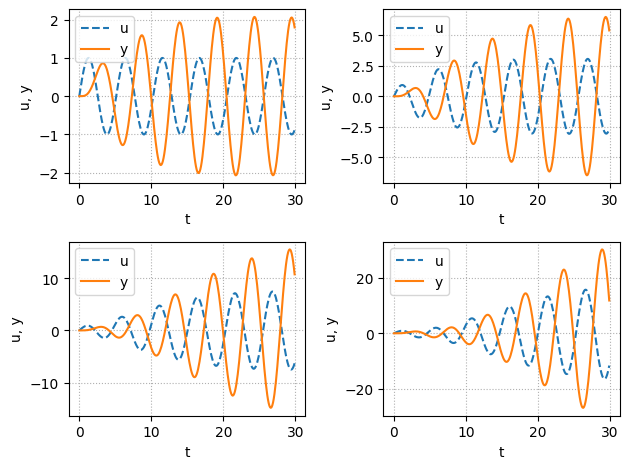

In [11]:
from control.matlab import lsim, margin

P = tf([1], [1, 1, 1.5, 1])

# 位相がπ遅れる周波数を取得する
_, _, wpc, _ = margin(P)

t = np.arange(0, 30, 0.1)
u = np.sin(wpc * t)
y = np.zeros_like(t)

fig, ax = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        # 出力をフィードバックして次の時刻の入力を計算
        u = np.sin(wpc * t) - y
        y, t, _ = lsim(P, u, t, 0)

        ax[i, j].plot(t, u, ls='--', label='u')
        ax[i, j].plot(t, y, label='y')
        plot_set(ax[i, j], 't', 'u, y', 'best')

fig.tight_layout()


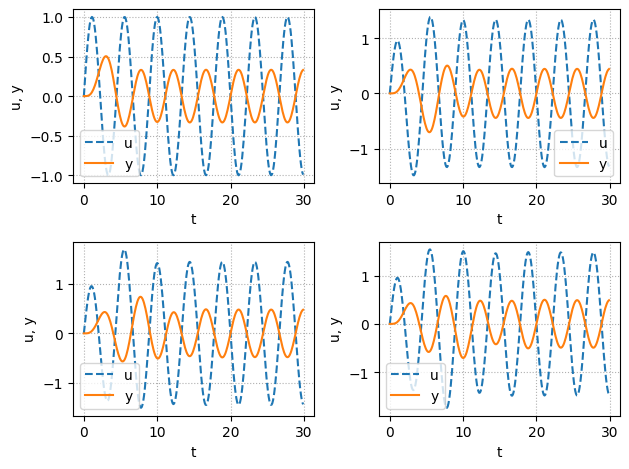

In [12]:
P = tf([1], [1, 2, 2, 1])

# 位相がπ遅れる周波数を取得する
_, _, wpc, _ = margin(P)

t = np.arange(0, 30, 0.1)
u = np.sin(wpc * t)
y = np.zeros_like(t)

fig, ax = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        # 出力をフィードバックして次の時刻の入力を計算
        u = np.sin(wpc * t) - y
        y, t, _ = lsim(P, u, t, 0)

        ax[i, j].plot(t, u, ls='--', label='u')
        ax[i, j].plot(t, y, label='y')
        plot_set(ax[i, j], 't', 'u, y', 'best')

fig.tight_layout()

C:\Users\asei\AppData\Local\Temp\ipykernel_5080\740781675.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig_ax.legend(loc=args[2])


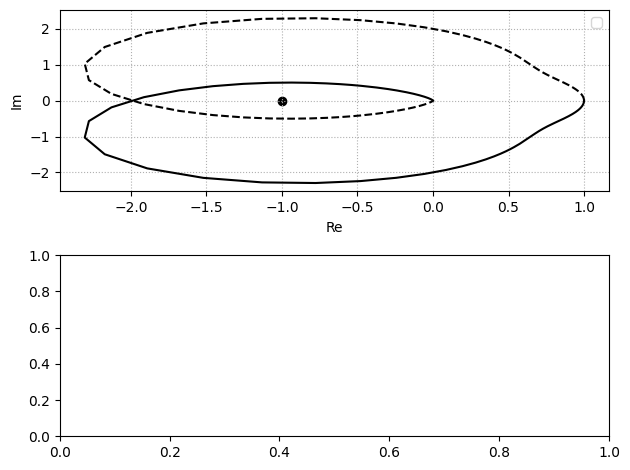

In [17]:
from control.matlab import nyquist, logspace

fig, ax = plt.subplots(2, 1)

# 開ループ系が不安定になる
P = tf([1], [1, 1, 1.5, 1])
x, y, _ = nyquist(P, logspace(-3, 5, 1000), plot=False)
ax[0].plot(x, y, color='k')
ax[0].plot(x, -y, ls="--", color='k')
ax[0].scatter(-1, 0, color='k')
plot_set(ax[0], 'Re', 'Im', 'best')

fig.tight_layout()